### Pyber Observable Trends

The ride sharing data was categorized by city type, to include: Urban, Suburban and Rural. The results show that Urban cities account for the majority of drivers (86.7%), rides (68.4%) and fares (62.7%). While Rural cities have the smallest marketshare of city types with 0.8% of total drivers, 5.3% of rides and 6.8% of fares.  

Urban cities have proportionately higher percent of drivers compared to the other two city types with 86.7% compared to 12.5% (Suburban) and 0.8% (Rural).  

Both Suburban and Rural cities have a slightly higher proportion of total fares versus rides to indicate that the average fare is higher per ride.  Unlike Urban cities which have a slightly lower proportion.  Further look into distance traveled per ride could provide a better understanding of this proportional difference as rides in urban areas may be more frequent but shorter distances (resulting in lower fares) whereas Suburban and Rural rides may be longer distances in comparison. 

In [17]:
%matplotlib inline
 
#Import dependencies for assignment
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


In [18]:
# Load two data files for manipulation and merging
city_data_df = pd.read_csv("city_data.csv")
ride_data_df = pd.read_csv("ride_data.csv")


In [19]:
ride_data_df = pd.read_csv("ride_data.csv")


In [20]:
#Merge two data sets on common vairable "city"
df = pd.merge(city_data_df, ride_data_df, on="city", how="left")

#Groupby city to create variables by city
city_group_df = df.groupby("city")

#Create variable for rides per city by coutning ride_id in the city group data
rides_per_city = city_group_df["ride_id"].count()

# Create variable for average of fares per city using mean function, reducing decimals places to two with round function
avg_fare_per_city = city_group_df["fare"].mean().round(2)

#Create variable for driver count, used mean as the current dataframe lists the driver count for each record by city and this was the simplest way I could figure it out
drivers_per_city = city_group_df["driver_count"].mean()

#Create colors variable somehow...could rename the three types with the colors I want as possible workaround...?
colors = "coral"

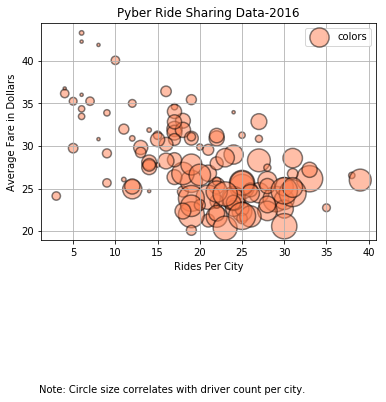

<Figure size 432x288 with 0 Axes>

In [21]:
#Plot bubble chart using the scatter function
plt.scatter(x=rides_per_city, y=avg_fare_per_city, s=(drivers_per_city)*10, alpha=0.5, c=colors, edgecolors="k", linewidths=1.5)
plt.title("Pyber Ride Sharing Data-2016")
plt.xlabel("Rides Per City")
plt.ylabel("Average Fare in Dollars")
plt.grid()
plt.legend(['colors'])
plt.text(1, 1, "Note: Circle size correlates with driver count per city.")
plt.show()
plt.savefig("Pyber_Ride_Sharing_Fares_and_Rides_By_City.png")

#Need to incorporate 4th demension of map with the colored bubbles representing type of city

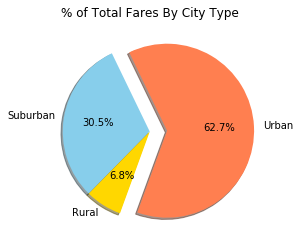

<Figure size 432x288 with 0 Axes>

In [22]:
#Create pie chart for % of total fare dollar value by city type
type_group_df = df.groupby("type").sum()

#print(type_group_df) 

#Assign variables from groupby table
urban_fare = type_group_df["fare"]["Urban"]
suburban_fare = type_group_df["fare"]["Suburban"]
rural_fare = type_group_df["fare"]["Rural"]
total_fare = urban_fare + suburban_fare + rural_fare

#Caluculate the percentage of each type to use in pie chart
urban_fare = (urban_fare/total_fare)*100
suburban_fare = (suburban_fare/total_fare)*100
rural_fare = (rural_fare/total_fare)*100

#Assign variables to the pie chart
types = ["Urban", "Suburban", "Rural"]
percent_fares = [urban_fare, suburban_fare, rural_fare]
colors = ["coral", "skyblue", "gold"]
explode = (0.2,0,0)

#Plot the pie chart, add formatting and labels
plt.pie(percent_fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.title("% of Total Fares By City Type")
axis = "equal"
plt.show()
plt.savefig("Pyber_Fares_By_City.png")

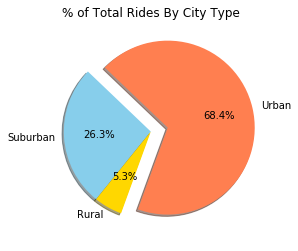

<Figure size 432x288 with 0 Axes>

In [23]:
#Create list from dataframe for the city type variable
city_type_list = df["type"]

#Get length of the list to use in denominator 
total_rides = len(city_type_list)

#Count the three different types and assign variables
urban_rides = len(city_type_list[city_type_list =="Urban"])
suburban_rides = len(city_type_list[city_type_list =="Suburban"])
rural_rides = len(city_type_list[city_type_list =="Rural"])

#Caluculate the percentage of each type to use in pie chart
urban_rides = (urban_rides/total_rides)*100
suburban_rides = (suburban_rides/total_rides)*100
rural_rides = (rural_rides/total_rides)*100

#Assign variables to the pie chart
types = ["Urban", "Suburban", "Rural"]
percent_rides = [urban_rides, suburban_rides, rural_rides]
colors = ["coral", "skyblue", "gold"]
explode = (0.2,0,0)

#Plot the pie chart, add formatting and labels
plt.pie(percent_rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.title("% of Total Rides By City Type")
axis = "equal"
plt.show()
plt.savefig("Pyber_Rides_By_City.png")

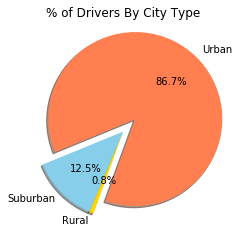

<Figure size 432x288 with 0 Axes>

In [24]:
#Create pie chart for % of total drivers by city type
driver_group_df = df.groupby("type").sum()

#Assign variables from groupby table
urban_drivers = driver_group_df["driver_count"]["Urban"]
suburban_drivers = driver_group_df["driver_count"]["Suburban"]
rural_drivers = driver_group_df["driver_count"]["Rural"]
total_drivers = urban_drivers + suburban_drivers + rural_drivers

#Calculate the percentage of each type to use in pie chart
urban_drivers = (urban_drivers/total_drivers)*100
suburban_drivers = (suburban_drivers/total_drivers)*100
rural_drivers = (rural_drivers/total_drivers)*100

#Assign variables to the pie chart
types = ["Urban", "Suburban", "Rural"]
percent_drivers = [urban_drivers, suburban_drivers, rural_drivers]
colors = ["coral", "skyblue", "gold"]
explode = (0.2,0,0)

#Plot the pie chart, add formatting and labels
plt.pie(percent_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.title("% of Drivers By City Type")
axis = "equal"
plt.show()
plt.savefig("Pyber_Drivers_By_City.png")